## Get my Playlist

In [1]:
import os
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Load environment variables from .env file
load_dotenv()

# Get Spotify API credentials from environment variables
SPOTIPY_CLIENT_ID = os.getenv('SPOTIPY_CLIENT_ID')
SPOTIPY_CLIENT_SECRET = os.getenv('SPOTIPY_CLIENT_SECRET')
SPOTIPY_REDIRECT_URI = os.getenv('SPOTIPY_REDIRECT_URI')
SAIF_SONGS_ID = os.getenv('MAMA_SONGS_ID')

# All available Spotify scopes
SCOPES = [
    'ugc-image-upload', 'user-read-playback-state', 'user-modify-playback-state', 
    'user-read-currently-playing', 'app-remote-control', 'streaming', 
    'playlist-read-private', 'playlist-read-collaborative', 'playlist-modify-private', 
    'playlist-modify-public', 'user-follow-modify', 'user-follow-read', 
    'user-read-playback-position', 'user-top-read', 'user-read-recently-played', 
    'user-library-modify', 'user-library-read', 'user-read-email', 'user-read-private'
]

# Join all scopes into a space-separated string
SCOPE = ' '.join(SCOPES)

# Set up SpotifyOAuth
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=SPOTIPY_CLIENT_ID,
                                               client_secret=SPOTIPY_CLIENT_SECRET,
                                               redirect_uri=SPOTIPY_REDIRECT_URI,
                                               scope=SCOPE))

playlist_name = "Mama Songs"
results = sp.playlist_tracks(SAIF_SONGS_ID)
tracks = results['items']
while results['next']:
    results = sp.next(results)
    tracks.extend(results['items'])

# Extract song and artist information
songs = []
for track in tracks:
    track_info = track['track']
    song_name = track_info['name']
    artists = ', '.join([artist['name'] for artist in track_info['artists']])
    songs.append(f"{song_name} by {artists}")

print(f"There are {len(songs)} songs in '{playlist_name}")
print("------------------------------------------")
print(f"Songs in the playlist '{playlist_name}':")
for i, song in enumerate(songs, 1):
    print(f"{i}. {song}")

There are 85 songs in 'Mama Songs
------------------------------------------
Songs in the playlist 'Mama Songs':
1. Al Qalb Yehib Marrah by Shadia
2. Al Qalb Yehib Marrah by Shadia
3. Ya Habebty Ya Masr by Shadia
4. Wehiat Eineik by Shadia
5. Ala El Kalam by Shadia
6. Youth by Shadia
7. Ya Aini Ala El Walad by Shadia
8. Tabtab Alena Al Hawa by Shadia
9. Ah Ya Smarany Loun by Shadia
10. Zeyna by Farid al-Atrash, Shadia
11. عش الحب by Shadia
12. Aaly Aaly by Shadia
13. Dour Dour by Shadia
14. Abou Amri Gharyb by Shadia
15. Abyad Ya Ward by Shadia
16. Ah Ya Lamouny by Shadia
17. Ah Ya Smarany Loun by Shadia
18. Ah Ya Smarany Loun by Shadia
19. Ahanni Qalbi by Shadia
20. Ala El Kalam by Shadia
21. Ajmal Salam by Shadia
22. Al Qalb Yehib Marrah by Shadia
23. Al Shams Banit by Shadia
24. Al Ward Wi Shouk by Shadia
25. Al Zafah by Shadia
26. Yali Shaghalt El Alb by Mohamed Fawzi, Layla Mourad
27. Mama zamnha gayah - Remastered by Mohamed Fawzi
28. Ter Bina Ya Kalbi by Mohamed Fawzi
29. Quassa

## Get the Genres from my Playlist

In [2]:
from collections import defaultdict

def get_artist_genres(artist_id):
    artist_info = sp.artist(artist_id)
    return artist_info['genres']

def classify_genres(tracks):
    genre_classification = defaultdict(list)
    
    for track in tracks:
        track_info = track['track']
        song_name = track_info['name']
        artists = track_info['artists']
        
        # Get genres for all artists of the track
        track_genres = set()
        for artist in artists:
            artist_genres = get_artist_genres(artist['id'])
            track_genres.update(artist_genres)
        
        # If no genres found, classify as 'Unknown'
        if not track_genres:
            genre_classification['Unknown'].append(song_name)
        else:
            # Classify track under each of its genres
            for genre in track_genres:
                genre_classification[genre].append(song_name)
    
    return genre_classification

def print_genre_classification(genre_classification):
    for genre, songs in genre_classification.items():
        print(f"\n{genre.capitalize()}:")
        for song in songs:
            print(f"- {song}")

In [3]:
print(f"Classifying songs from the playlist '{playlist_name}' into genres...")
genre_classification = classify_genres(tracks)
print_genre_classification(genre_classification)

Classifying songs from the playlist 'Mama Songs' into genres...

Classic arab pop:
- Al Qalb Yehib Marrah
- Al Qalb Yehib Marrah
- Ya Habebty Ya Masr
- Wehiat Eineik
- Ala El Kalam
- Youth
- Ya Aini Ala El Walad
- Tabtab Alena Al Hawa
- Ah Ya Smarany Loun
- Zeyna
- عش الحب
- Aaly Aaly
- Dour Dour
- Abou Amri Gharyb
- Abyad Ya Ward
- Ah Ya Lamouny
- Ah Ya Smarany Loun
- Ah Ya Smarany Loun
- Ahanni Qalbi
- Ala El Kalam
- Ajmal Salam
- Al Qalb Yehib Marrah
- Al Shams Banit
- Al Ward Wi Shouk
- Al Zafah
- Yali Shaghalt El Alb
- Mama zamnha gayah - Remastered
- Ter Bina Ya Kalbi
- Quassaman
- Malou el amar - Remastered
- Ya habibi khd enya
- Taab el hawa albi - Remastered
- Ya layale alshok
- Youm alkhames
- Ahlan Rmdan
- هو انت مين
- تيجي نسيب
- خليك معاها
- W Nefdal Norkos
- أحلامنا
- ياريتك فاهمني
- Loha Bahta
- بقالك قلب
- كان برئ
- خليني شوية معاك

Arab pop:
- Al Qalb Yehib Marrah
- Al Qalb Yehib Marrah
- Ya Habebty Ya Masr
- Wehiat Eineik
- Ala El Kalam
- Youth
- Ya Aini Ala El Walad


In [4]:
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx
import pandas as pd
from collections import Counter

def create_genre_bar_chart(genre_classification):
    genres = list(genre_classification.keys())
    song_counts = [len(songs) for songs in genre_classification.values()]
    
    fig = go.Figure(data=[go.Bar(x=genres, y=song_counts)])
    fig.update_layout(title='Number of Songs per Genre',
                      xaxis_title='Genre',
                      yaxis_title='Number of Songs')
    fig.show()

def create_genre_pie_chart(genre_classification):
    genres = list(genre_classification.keys())
    song_counts = [len(songs) for songs in genre_classification.values()]
    
    fig = go.Figure(data=[go.Pie(labels=genres, values=song_counts)])
    fig.update_layout(title='Distribution of Songs across Genres')
    fig.show()

def create_genre_network(genre_classification):
    # Create a graph
    G = nx.Graph()
    
    # Add nodes (genres)
    for genre in genre_classification.keys():
        G.add_node(genre)
    
    # Add edges (connections between genres that share songs)
    for genre1 in genre_classification.keys():
        for genre2 in genre_classification.keys():
            if genre1 != genre2:
                shared_songs = set(genre_classification[genre1]) & set(genre_classification[genre2])
                if shared_songs:
                    G.add_edge(genre1, genre2, weight=len(shared_songs))
    
    # Get position layout for nodes
    pos = nx.spring_layout(G)
    
    # Create edges trace
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
    
    edge_trace = go.Scatter(x=edge_x, y=edge_y, line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')
    
    # Create nodes trace
    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
    
    node_trace = go.Scatter(x=node_x, y=node_y, mode='markers+text', hoverinfo='text', 
                            marker=dict(size=10, line_width=2),
                            text=list(G.nodes()), textposition="top center")
    
    # Create the figure
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(showlegend=False, hovermode='closest',
                                     margin=dict(b=0,l=0,r=0,t=0),
                                     xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                                     yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
    
    fig.update_layout(title='Genre Relationship Network')
    fig.show()

def create_song_heatmap(genre_classification):
    # Flatten the genre classification
    data = [(song, genre) for genre, songs in genre_classification.items() for song in songs]
    df = pd.DataFrame(data, columns=['Song', 'Genre'])
    
    # Count occurrences of each song in each genre
    pivot_df = df.pivot_table(index='Song', columns='Genre', aggfunc=len, fill_value=0)
    
    fig = px.imshow(pivot_df, aspect="auto", labels=dict(color="Genre Count"))
    fig.update_layout(title='Song-Genre Heatmap',
                      xaxis_title='Genre',
                      yaxis_title='Song')
    fig.show()

def create_word_cloud(genre_classification):
    # Count all words in song titles
    word_count = Counter()
    for songs in genre_classification.values():
        for song in songs:
            words = song.lower().split()
            word_count.update(words)
    
    # Create a dataframe from word counts
    df = pd.DataFrame.from_dict(word_count, orient='index').reset_index()
    df.columns = ['word', 'count']
    df = df.sort_values('count', ascending=False)
    
    fig = px.treemap(df, path=['word'], values='count')
    fig.update_layout(title='Word Frequency in Song Titles')
    fig.show()

In [5]:
create_genre_bar_chart(genre_classification)
create_genre_pie_chart(genre_classification)
create_genre_network(genre_classification)
create_song_heatmap(genre_classification)
create_word_cloud(genre_classification)

In [6]:
def classify_song_to_single_genre(genre_classification):
    song_genre = {}
    for genre, songs in genre_classification.items():
        for song in songs:
            if song not in song_genre:
                song_genre[song] = genre
            else:
                # If the song is already classified, choose the more specific genre
                # (assuming that the genre with fewer songs is more specific)
                if len(genre_classification[genre]) < len(genre_classification[song_genre[song]]):
                    song_genre[song] = genre
    return song_genre

def create_song_genre_bar_chart(genre_classification):
    song_genre = classify_song_to_single_genre(genre_classification)
    
    # Count the number of songs in each genre
    genre_counts = Counter(song_genre.values())
    
    # Sort genres by count
    sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
    genres, counts = zip(*sorted_genres)
    
    # Create the bar chart
    fig = go.Figure(go.Bar(
        y=genres,
        x=counts,
        orientation='h'
    ))
    
    fig.update_layout(
        title='Number of Songs per Genre (Single Genre Classification)',
        xaxis_title='Number of Songs',
        yaxis_title='Genre',
        height=max(600, len(genres) * 20),  # Adjust height based on number of genres
        yaxis={'categoryorder':'total ascending'}
    )
    
    fig.show()

In [7]:
create_song_genre_bar_chart(genre_classification)

## Get rid of Unknown genres

In [8]:
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx
import pandas as pd
from collections import Counter

def create_genre_histogram(genre_classification, sp):
    # First, determine the primary genre for each song (reusing logic from create_song_genre_bar_chart)
    song_primary_genres = []
    for genre, songs in genre_classification.items():
        for song in songs:
            if genre != 'Unknown':
                song_primary_genres.append(genre)
            else:
                # If the genre is 'Unknown', find the next best genre (simplified version)
                results = sp.search(q=song, type='track', limit=1)
                if results['tracks']['items']:
                    track = results['tracks']['items'][0]
                    artist_id = track['artists'][0]['id']
                    artist_info = sp.artist(artist_id)
                    artist_genres = artist_info['genres']
                    if artist_genres:
                        song_primary_genres.append(artist_genres[0])
                    else:
                        song_primary_genres.append('Other')
                else:
                    song_primary_genres.append('Other')
    
    # Count the occurrences of each genre
    genre_counts = Counter(song_primary_genres)
    
    # Sort genres by count (descending)
    sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
    genres, counts = zip(*sorted_genres)
    
    # Create the histogram
    fig = go.Figure(data=[go.Bar(
        x=genres,
        y=counts,
        text=counts,
        textposition='auto',
    )])
    
    fig.update_layout(
        title='Distribution of Songs Across Genres',
        xaxis_title='Genres',
        yaxis_title='Number of Songs',
        xaxis_tickangle=-45,
        bargap=0.1,
        height=600,
        margin=dict(b=100)  # Increase bottom margin to fit genre labels
    )
    
    fig.show()


In [9]:
create_genre_histogram(genre_classification, sp)

## Get similar genres and group them together

In [10]:
from gensim.models import KeyedVectors
import numpy as np
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from collections import Counter, defaultdict
import re

# Load pre-trained word vectors
word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

def preprocess_genre(genre):
    # Convert to lowercase and split into words
    words = re.findall(r'\w+', genre.lower())
    return words

def get_genre_embedding(genre):
    words = preprocess_genre(genre)
    vectors = [word_vectors[word] for word in words if word in word_vectors]
    if vectors:
        return np.mean(vectors, axis=0)
    return np.zeros(300)  # Return zero vector if no words are found

def cluster_genres(genres, n_clusters=10):
    # Get embeddings for each genre
    genre_embeddings = [get_genre_embedding(genre) for genre in genres]
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(genre_embeddings)
    
    # Group genres by cluster
    clustered_genres = defaultdict(list)
    for genre, label in zip(genres, cluster_labels):
        clustered_genres[label].append(genre)
    
    # Name each cluster based on the most common words in its genres
    named_clusters = {}
    for label, cluster_genres in clustered_genres.items():
        all_words = [word for genre in cluster_genres for word in preprocess_genre(genre)]
        word_counts = Counter(all_words)
        cluster_name = ' '.join([word for word, _ in word_counts.most_common(3)])
        named_clusters[cluster_name] = cluster_genres
    
    return named_clusters

def create_clustered_genre_histogram(genre_classification, sp):
    # First, determine the primary genre for each song (reusing logic from previous function)
    song_primary_genres = []
    for genre, songs in genre_classification.items():
        for song in songs:
            if genre != 'Unknown':
                song_primary_genres.append(genre)
            else:
                # If the genre is 'Unknown', find the next best genre (simplified version)
                results = sp.search(q=song, type='track', limit=1)
                if results['tracks']['items']:
                    track = results['tracks']['items'][0]
                    artist_id = track['artists'][0]['id']
                    artist_info = sp.artist(artist_id)
                    artist_genres = artist_info['genres']
                    if artist_genres:
                        song_primary_genres.append(artist_genres[0])
                    else:
                        continue  # Skip if no genre is found
                else:
                    continue  # Skip if track is not found
    
    # Cluster the genres
    clustered_genres = cluster_genres(set(song_primary_genres))
    
    # Count songs in each cluster
    cluster_counts = Counter()
    for song_genre in song_primary_genres:
        for cluster_name, genres in clustered_genres.items():
            if song_genre in genres:
                cluster_counts[cluster_name] += 1
                break
    
    # Sort clusters by count
    sorted_clusters = sorted(cluster_counts.items(), key=lambda x: x[1], reverse=True)
    cluster_names, counts = zip(*sorted_clusters)
    
    # Create the histogram
    fig = go.Figure(data=[go.Bar(
        x=cluster_names,
        y=counts,
        text=counts,
        textposition='auto',
        marker_color='rgb(158,202,225)',
        marker_line_color='rgb(8,48,107)',
        marker_line_width=1.5,
        opacity=0.6
    )])
    
    fig.update_layout(
        title={
            'text': 'Distribution of Songs Across Clustered Genres',
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        xaxis_title='Genre Clusters',
        yaxis_title='Number of Songs',
        xaxis_tickangle=-45,
        bargap=0.2,
        height=600,
        margin=dict(b=100, l=50, r=50, t=100),
        plot_bgcolor='rgb(243, 243, 243)',
        paper_bgcolor='rgb(243, 243, 243)',
        font=dict(family="Arial", size=12, color="rgb(68, 68, 68)")
    )
    
    # Add hover information
    hovertext = []
    for cluster_name in cluster_names:
        genres_in_cluster = '<br>'.join(clustered_genres[cluster_name])
        hovertext.append(f'Cluster: {cluster_name}<br>Genres:<br>{genres_in_cluster}')
    
    fig.update_traces(hovertext=hovertext, hoverinfo='text')
    
    fig.show()


In [11]:
create_clustered_genre_histogram(genre_classification, sp)

In [12]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import requests
import io
import pandas as pd
import seaborn as sns


def get_audio_features(track_id):
    """Get audio features for a track from Spotify API"""
    return sp.audio_features(track_id)[0]

def download_preview(preview_url):
    """Download the audio preview"""
    response = requests.get(preview_url)
    return io.BytesIO(response.content)

def visualize_waveform(y, sr):
    """Visualize the audio waveform"""
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Audio Waveform')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

def visualize_spectrogram(y, sr):
    """Visualize the spectrogram"""
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()

def visualize_audio_features(features):
    """Visualize audio features"""
    feature_names = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
    feature_values = [features[name] for name in feature_names]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_names, y=feature_values)
    plt.title('Audio Features')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def analyze_audio(track_id, preview_url, visualize=True):
    """Analyze audio and create visualizations"""
    # Get audio features from Spotify API
    features = get_audio_features(track_id)

    # Download and load audio preview
    audio_file = download_preview(preview_url)
    y, sr = librosa.load(audio_file)

    if visualize:
        # Visualize waveform and spectrogram
        visualize_waveform(y, sr)
        visualize_spectrogram(y, sr)

        # Visualize audio features
        visualize_audio_features(features)

    # Print statistical analysis
    print(f"Tempo: {features['tempo']} BPM")
    print(f"Loudness: {features['loudness']} dB")
    print(f"Key: {features['key']}")
    print(f"Mode: {'Major' if features['mode'] == 1 else 'Minor'}")
    print(f"Time Signature: {features['time_signature']}/4")

    # Calculate and print additional statistics
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = np.mean(chroma, axis=1)
    pitch_class_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    dominant_pitch = pitch_class_names[np.argmax(chroma_mean)]
    
    print(f"\nDominant Pitch Class: {dominant_pitch}")
    print(f"Mean Chroma Energy: {np.mean(chroma_mean):.4f}")
    print(f"Std Chroma Energy: {np.std(chroma_mean):.4f}")

    if visualize:
        # Visualize chroma features
        plt.figure(figsize=(10, 6))
        librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
        plt.colorbar()
        plt.title('Chroma Features')
        plt.tight_layout()
        plt.show()
    
    return [features, dominant_pitch, np.mean(chroma_mean), np.std(chroma_mean)]

Analyzing: Al Qalb Yehib Marrah by Shadia


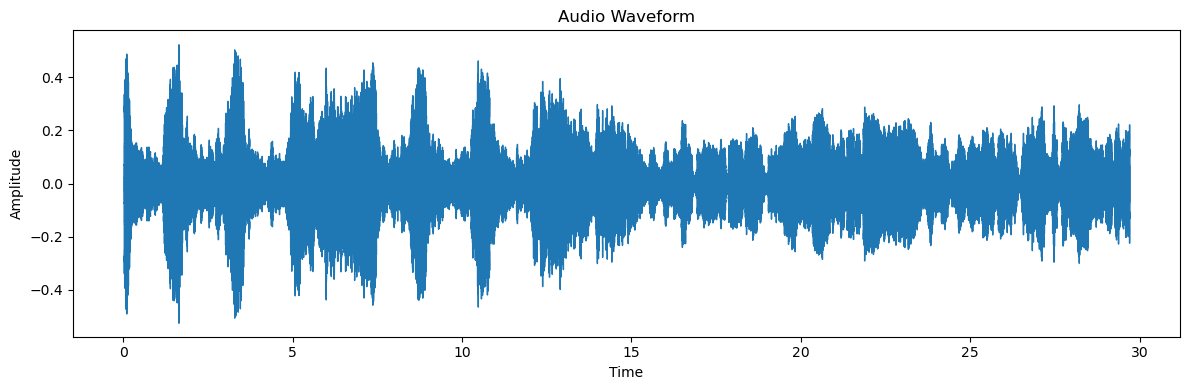

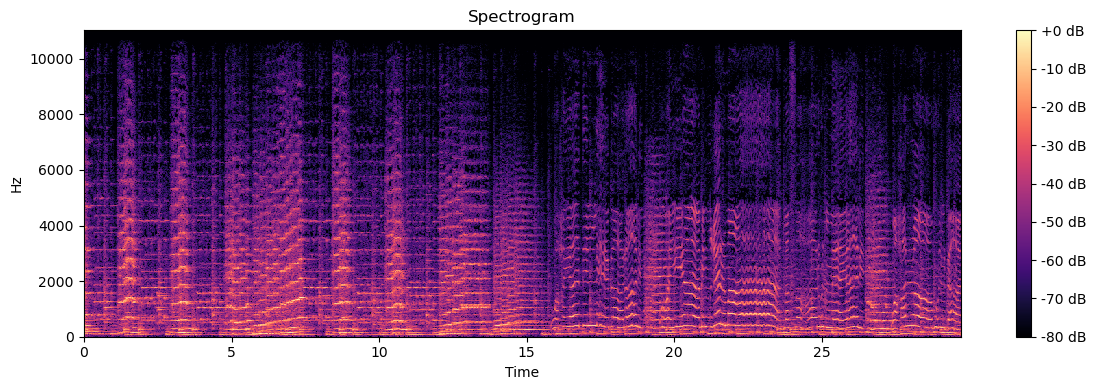

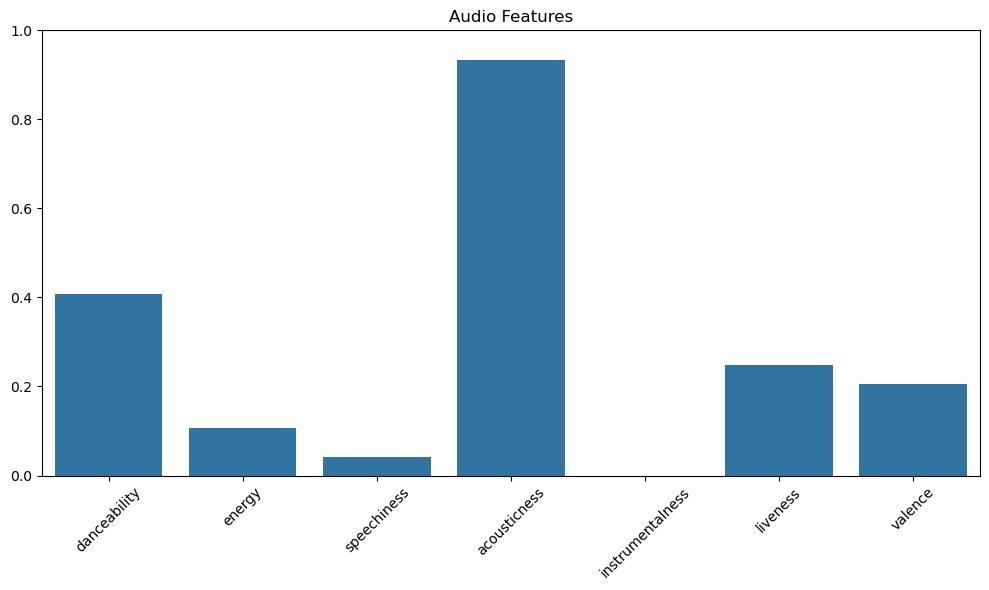

Tempo: 131.16 BPM
Loudness: -15.387 dB
Key: 7
Mode: Minor
Time Signature: 4/4

Dominant Pitch Class: C
Mean Chroma Energy: 0.2180
Std Chroma Energy: 0.0603


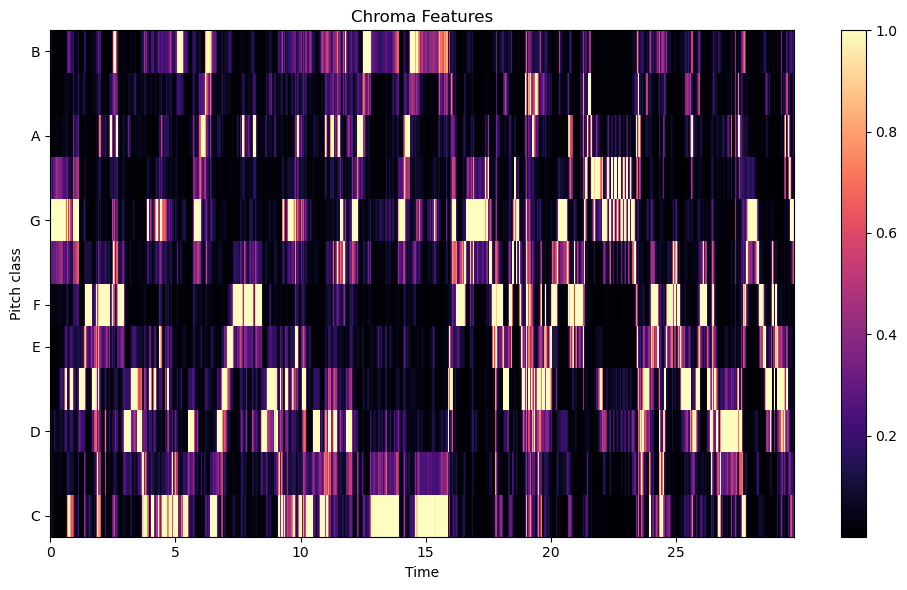

In [14]:
# Get the first track from the user's "Saif Songs" playlist
playlist_name = "Mama Songs"
playlists = sp.current_user_playlists()
playlist = next((pl for pl in playlists['items'] if pl['name'] == playlist_name), None)

if playlist:
    tracks = sp.playlist_tracks(playlist['id'])
    if tracks['items']:
        track = tracks['items'][0]['track']
        track_id = track['id']
        preview_url = track['preview_url']
        
        if preview_url:
            print(f"Analyzing: {track['name']} by {track['artists'][0]['name']}")
            analyze_audio(track_id, preview_url)
        else:
            print("No preview available for this track.")
    else:
        print("No tracks found in the playlist.")
else:
    print(f"Playlist '{playlist_name}' not found.")

In [15]:
tracks = sp.playlist_tracks(playlist['id'])
song_data = []
if tracks['items']:
    for i, _ in enumerate(tracks['items']):
        track = tracks['items'][i]['track']
        track_id = track['id']
        preview_url = track['preview_url']
        
        if preview_url:
            print(f"Analyzing: {track['name']} by {track['artists'][0]['name']}")
            data = analyze_audio(track_id, preview_url, visualize=False)
            song_data.append(data)
        else:
            print("No preview available for this track.")
        print("----------------------------------------")
else:
    print("No tracks found in the playlist.")

Analyzing: Al Qalb Yehib Marrah by Shadia
Tempo: 131.16 BPM
Loudness: -15.387 dB
Key: 7
Mode: Minor
Time Signature: 4/4

Dominant Pitch Class: C
Mean Chroma Energy: 0.2180
Std Chroma Energy: 0.0603
----------------------------------------
Analyzing: Al Qalb Yehib Marrah by Shadia
Tempo: 131.16 BPM
Loudness: -15.387 dB
Key: 7
Mode: Minor
Time Signature: 4/4

Dominant Pitch Class: C
Mean Chroma Energy: 0.2180
Std Chroma Energy: 0.0603
----------------------------------------
Analyzing: Ya Habebty Ya Masr by Shadia
Tempo: 135.878 BPM
Loudness: -9.377 dB
Key: 10
Mode: Minor
Time Signature: 4/4

Dominant Pitch Class: A#
Mean Chroma Energy: 0.3468
Std Chroma Energy: 0.0294
----------------------------------------
Analyzing: Wehiat Eineik by Shadia
Tempo: 110.381 BPM
Loudness: -8.502 dB
Key: 7
Mode: Minor
Time Signature: 4/4

Dominant Pitch Class: A#
Mean Chroma Energy: 0.2546
Std Chroma Energy: 0.0828
----------------------------------------
Analyzing: Ala El Kalam by Shadia
Tempo: 130.448 B

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def analyze_playlist_patterns(song_data):
    """Analyze patterns in the playlist song data"""
    
    # Convert song_data to a DataFrame
    columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
               'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
               'duration_ms', 'time_signature', 'dominant_pitch', 'mean_chroma_energy', 'std_chroma_energy']
    df = pd.DataFrame([item[0] for item in song_data], columns=columns)
    
    # Add dominant pitch, mean chroma energy, and std chroma energy
    df['dominant_pitch'] = [item[1] for item in song_data]
    df['mean_chroma_energy'] = [item[2] for item in song_data]
    df['std_chroma_energy'] = [item[3] for item in song_data]
    
    # Convert dominant_pitch to numerical
    pitch_to_num = {pitch: i for i, pitch in enumerate(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])}
    df['dominant_pitch_num'] = df['dominant_pitch'].map(pitch_to_num)
    
    # Normalize numerical features
    features_to_normalize = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 
                             'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                             'duration_ms', 'dominant_pitch_num', 'mean_chroma_energy', 'std_chroma_energy']
    scaler = StandardScaler()
    df_normalized = pd.DataFrame(scaler.fit_transform(df[features_to_normalize]), columns=features_to_normalize)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    df_normalized['Cluster'] = kmeans.fit_predict(df_normalized)
    
    # Perform PCA for visualization
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df_normalized.drop('Cluster', axis=1))
    df_normalized['PCA1'] = pca_result[:, 0]
    df_normalized['PCA2'] = pca_result[:, 1]
    
    # Visualize clusters
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df_normalized, x='PCA1', y='PCA2', hue='Cluster', palette='deep')
    plt.title('Song Clusters based on Audio Features')
    plt.show()
    
    # Analyze feature importance for each cluster
    cluster_means = df_normalized.groupby('Cluster').mean()
    plt.figure(figsize=(12, 8))
    sns.heatmap(cluster_means.drop(['PCA1', 'PCA2'], axis=1), cmap='YlGnBu', annot=True)
    plt.title('Feature Importance for Each Cluster')
    plt.show()
    
    # Analyze correlations between features
    plt.figure(figsize=(12, 10))
    sns.heatmap(df[features_to_normalize].corr(), cmap='coolwarm', annot=True, fmt='.2f')
    plt.title('Correlation between Audio Features')
    plt.show()
    
    # Identify trends
    print("Playlist Trends:")
    print(f"Average Danceability: {df['danceability'].mean():.2f}")
    print(f"Average Energy: {df['energy'].mean():.2f}")
    print(f"Most Common Key: {df['key'].mode().values[0]}")
    print(f"Average Tempo: {df['tempo'].mean():.2f} BPM")
    print(f"Most Common Time Signature: {df['time_signature'].mode().values[0]}/4")
    print(f"Most Common Dominant Pitch: {df['dominant_pitch'].mode().values[0]}")
    
    # Analyze mood (based on valence and energy)
    df['mood'] = df.apply(lambda row: 'Happy' if row['valence'] > 0.5 and row['energy'] > 0.5 else
                                      'Sad' if row['valence'] <= 0.5 and row['energy'] <= 0.5 else
                                      'Angry' if row['valence'] <= 0.5 and row['energy'] > 0.5 else 'Relaxed', axis=1)
    mood_distribution = df['mood'].value_counts(normalize=True)
    print("\nMood Distribution:")
    print(mood_distribution)
    
    # Visualize mood distribution
    plt.figure(figsize=(10, 6))
    mood_distribution.plot(kind='bar')
    plt.title('Mood Distribution in Playlist')
    plt.ylabel('Proportion')
    plt.show()


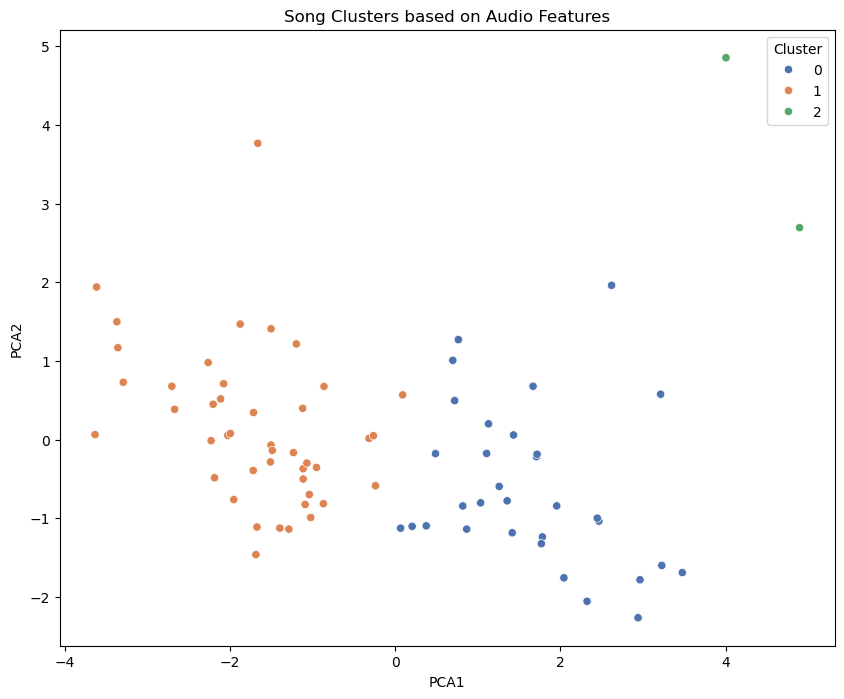

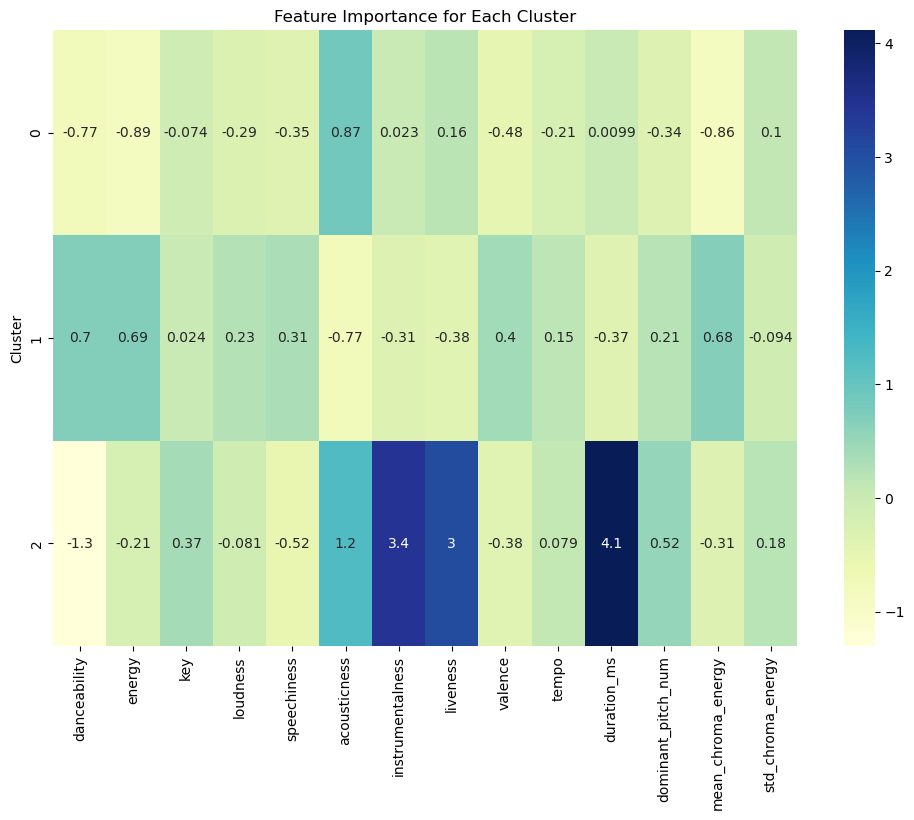

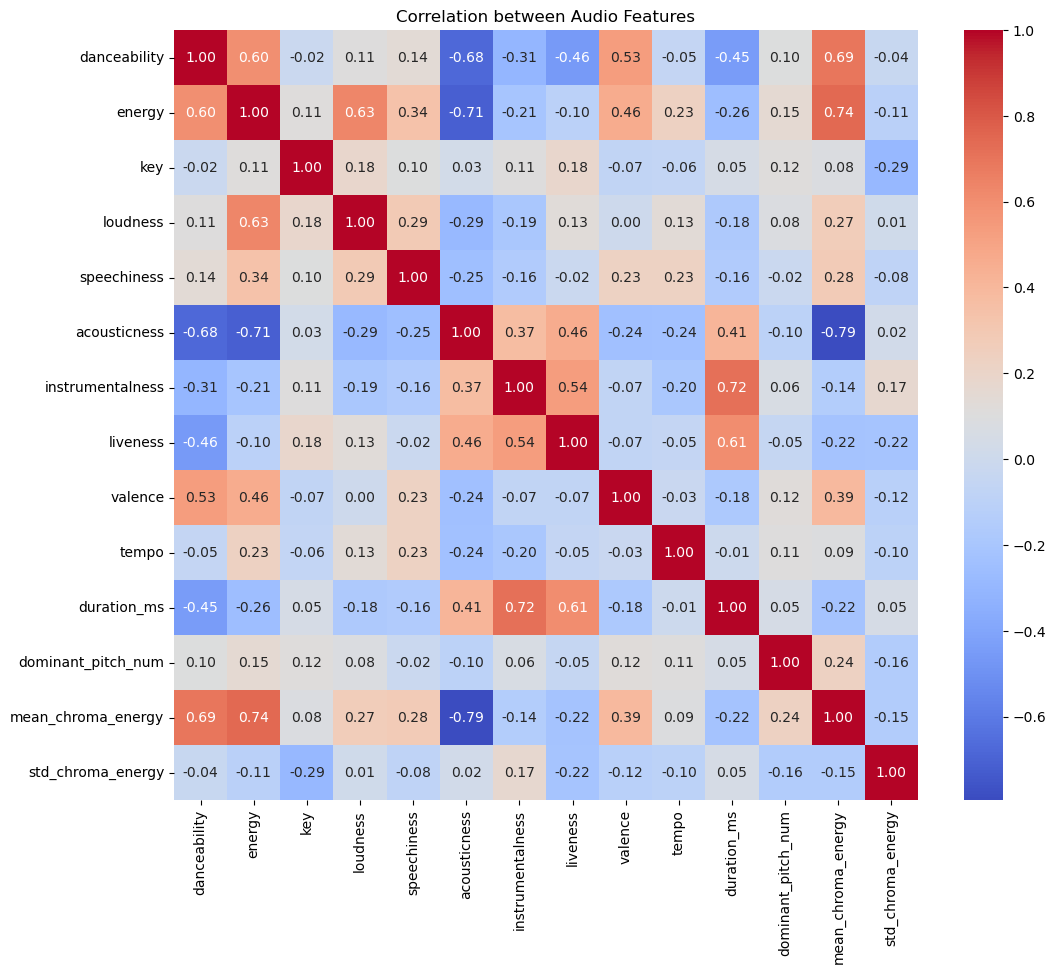

Playlist Trends:
Average Danceability: 0.55
Average Energy: 0.52
Most Common Key: 0
Average Tempo: 121.84 BPM
Most Common Time Signature: 4/4
Most Common Dominant Pitch: A

Mood Distribution:
mood
Happy      0.423529
Relaxed    0.258824
Sad        0.223529
Angry      0.094118
Name: proportion, dtype: float64


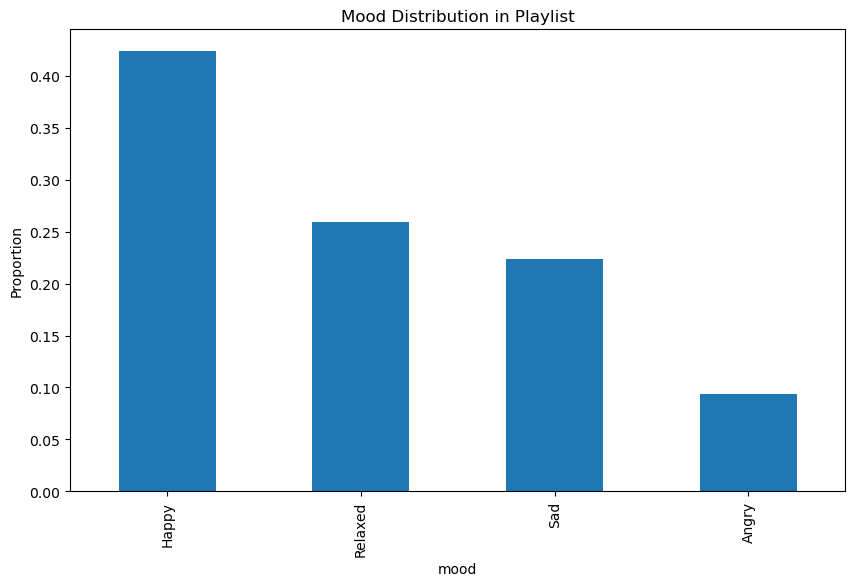

In [17]:
analyze_playlist_patterns(song_data)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def analyze_playlist_patterns(song_data):
    """Perform advanced analysis on playlist song data"""
    
    # Convert song_data to a DataFrame
    columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
               'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
               'duration_ms', 'time_signature', 'dominant_pitch', 'mean_chroma_energy', 'std_chroma_energy']
    df = pd.DataFrame([item[0] for item in song_data], columns=columns)
    
    # Add dominant pitch, mean chroma energy, and std chroma energy
    df['dominant_pitch'] = [item[1] for item in song_data]
    df['mean_chroma_energy'] = [item[2] for item in song_data]
    df['std_chroma_energy'] = [item[3] for item in song_data]
    
    # Convert dominant_pitch to numerical
    pitch_to_num = {pitch: i for i, pitch in enumerate(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])}
    df['dominant_pitch_num'] = df['dominant_pitch'].map(pitch_to_num)
    
    # Normalize numerical features
    features_to_normalize = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 
                             'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                             'duration_ms', 'dominant_pitch_num', 'mean_chroma_energy', 'std_chroma_energy']
    scaler = StandardScaler()
    df_normalized = pd.DataFrame(scaler.fit_transform(df[features_to_normalize]), columns=features_to_normalize)
    
    # 1. Enhanced Clustering Analysis
    # Determine optimal number of clusters
    silhouette_scores = []
    K = range(2, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df_normalized)
        silhouette_scores.append(silhouette_score(df_normalized, kmeans.labels_))
    
    optimal_k = K[np.argmax(silhouette_scores)]
    
    plt.figure(figsize=(10, 6))
    plt.plot(K, silhouette_scores, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. k')
    plt.show()
    
    print(f"Optimal number of clusters: {optimal_k}")
    
    # Perform K-means clustering with optimal k
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    df_normalized['Cluster'] = kmeans.fit_predict(df_normalized)
    
    # Visualize clusters using PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df_normalized.drop('Cluster', axis=1))
    df_normalized['PCA1'] = pca_result[:, 0]
    df_normalized['PCA2'] = pca_result[:, 1]
    
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df_normalized, x='PCA1', y='PCA2', hue='Cluster', palette='deep')
    plt.title('Song Clusters based on Audio Features')
    plt.show()
    
    # 2. Hierarchical Clustering
    linkage_matrix = linkage(df_normalized.drop(['Cluster', 'PCA1', 'PCA2'], axis=1), method='ward')
    
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()
    
    # 3. Feature Importance Analysis
    X = df[features_to_normalize]
    y = df['valence']  # Predict valence as an example
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    feature_importance = pd.DataFrame({'feature': features_to_normalize, 'importance': rf.feature_importances_})
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Feature Importance for Predicting Valence')
    plt.show()
    
    # 4. Correlation Analysis with p-values
    def calculate_correlation_with_p_value(x, y):
        corr, p_value = stats.pearsonr(x, y)
        return pd.Series([corr, p_value], index=['correlation', 'p_value'])
    
    correlation_matrix = df[features_to_normalize].corr()
    p_value_matrix = df[features_to_normalize].corr(method=lambda x, y: calculate_correlation_with_p_value(x, y)['p_value'])
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Audio Features')
    plt.show()
    
    print("\nStatistically Significant Correlations (p < 0.05):")
    for i in range(len(features_to_normalize)):
        for j in range(i+1, len(features_to_normalize)):
            if p_value_matrix.iloc[i, j] < 0.05:
                print(f"{features_to_normalize[i]} - {features_to_normalize[j]}: {correlation_matrix.iloc[i, j]:.2f} (p={p_value_matrix.iloc[i, j]:.4f})")
    
    # 5. Distribution Analysis
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features_to_normalize, 1):
        plt.subplot(4, 4, i)
        sns.histplot(df[feature], kde=True)
        plt.title(feature)
    plt.tight_layout()
    plt.show()
    
    # 6. Time Series Analysis (assuming songs are ordered by release date or addition to playlist)
    df['index'] = range(len(df))
    for feature in ['danceability', 'energy', 'valence']:
        result = seasonal_decompose(df[feature], model='additive', period=max(len(df)//10, 2))
        plt.figure(figsize=(12, 8))
        result.plot()
        plt.suptitle(f'Time Series Decomposition of {feature}')
        plt.tight_layout()
        plt.show()
    
    # 7. Mood Analysis
    df['mood'] = df.apply(lambda row: 'Happy' if row['valence'] > 0.5 and row['energy'] > 0.5 else
                                      'Sad' if row['valence'] <= 0.5 and row['energy'] <= 0.5 else
                                      'Angry' if row['valence'] <= 0.5 and row['energy'] > 0.5 else 'Relaxed', axis=1)
    
    plt.figure(figsize=(10, 6))
    df['mood'].value_counts(normalize=True).plot(kind='bar')
    plt.title('Mood Distribution in Playlist')
    plt.ylabel('Proportion')
    plt.show()
    
    # 8. Predictive Modeling
    X = df[features_to_normalize]
    y = df['valence']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("\nPredictive Model Performance:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared Score: {r2:.4f}")
    
    # 9. Summary Statistics
    print("\nSummary Statistics:")
    print(df[features_to_normalize].describe())
    
    # 10. Outlier Detection
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df[features_to_normalize])
    plt.xticks(rotation=90)
    plt.title('Boxplot of Audio Features (Outlier Detection)')
    plt.show()

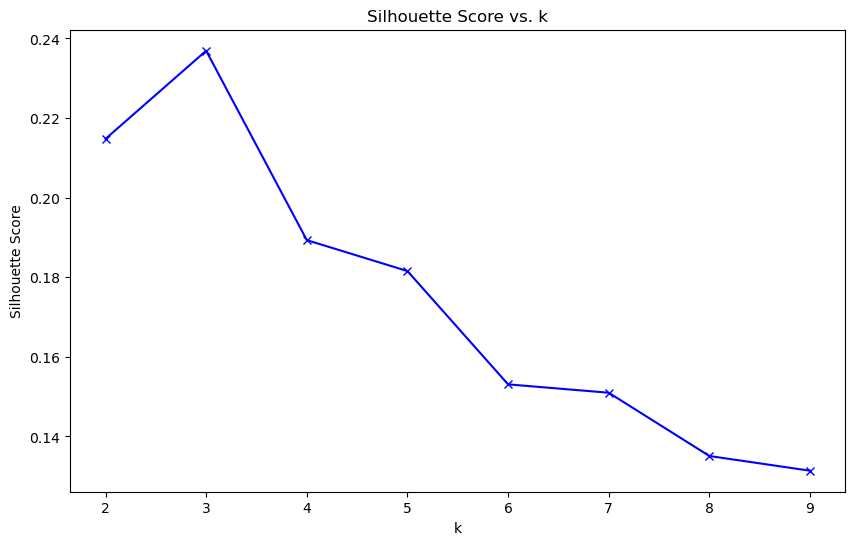

Optimal number of clusters: 3


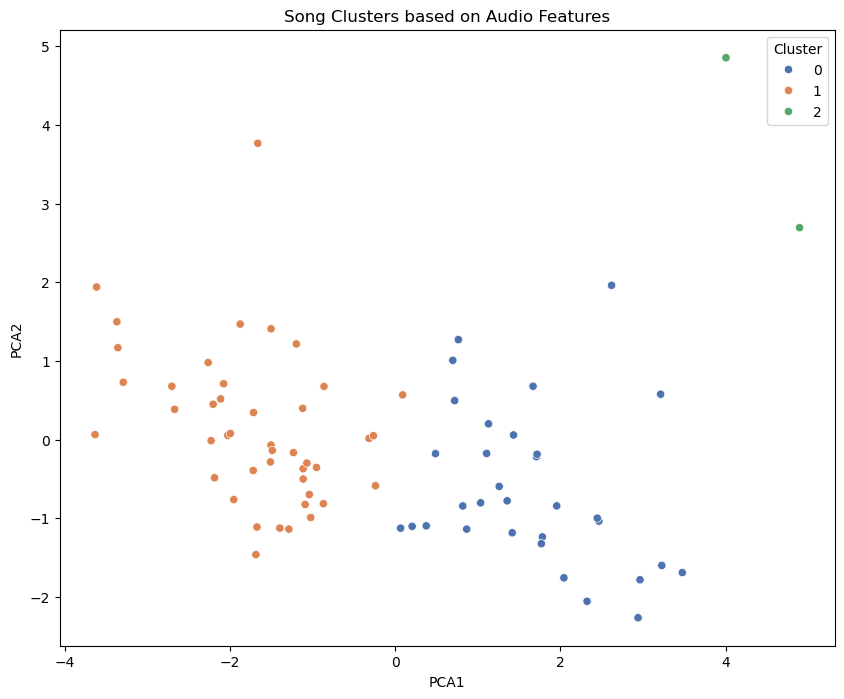

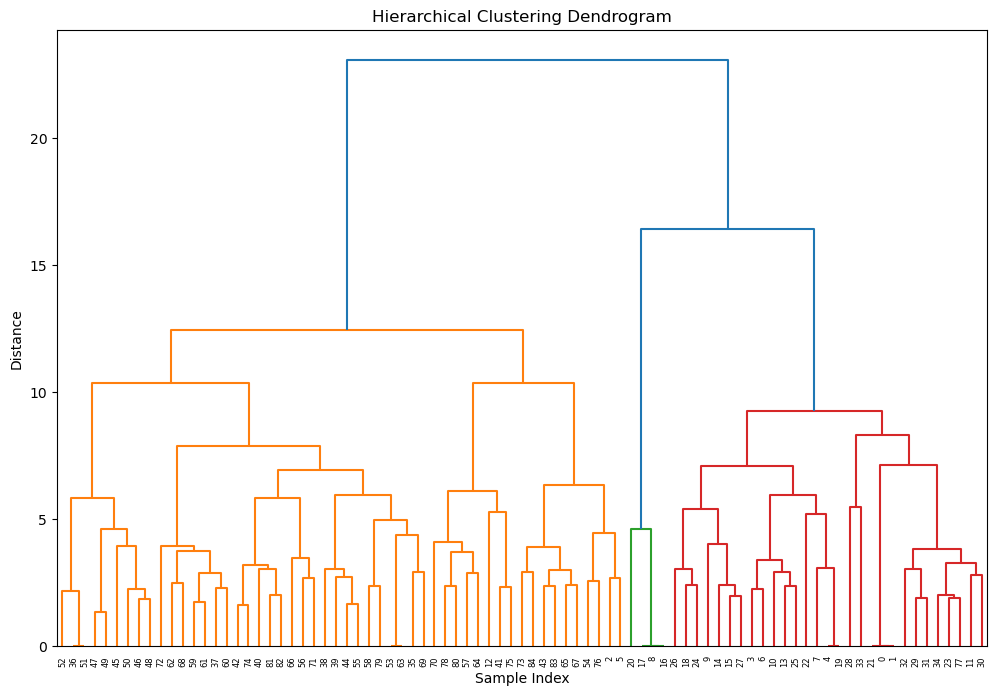

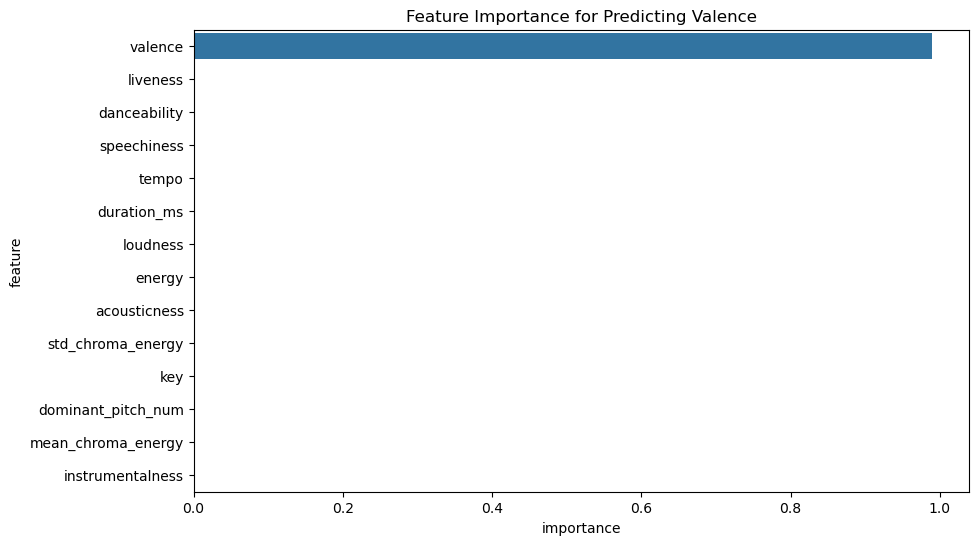

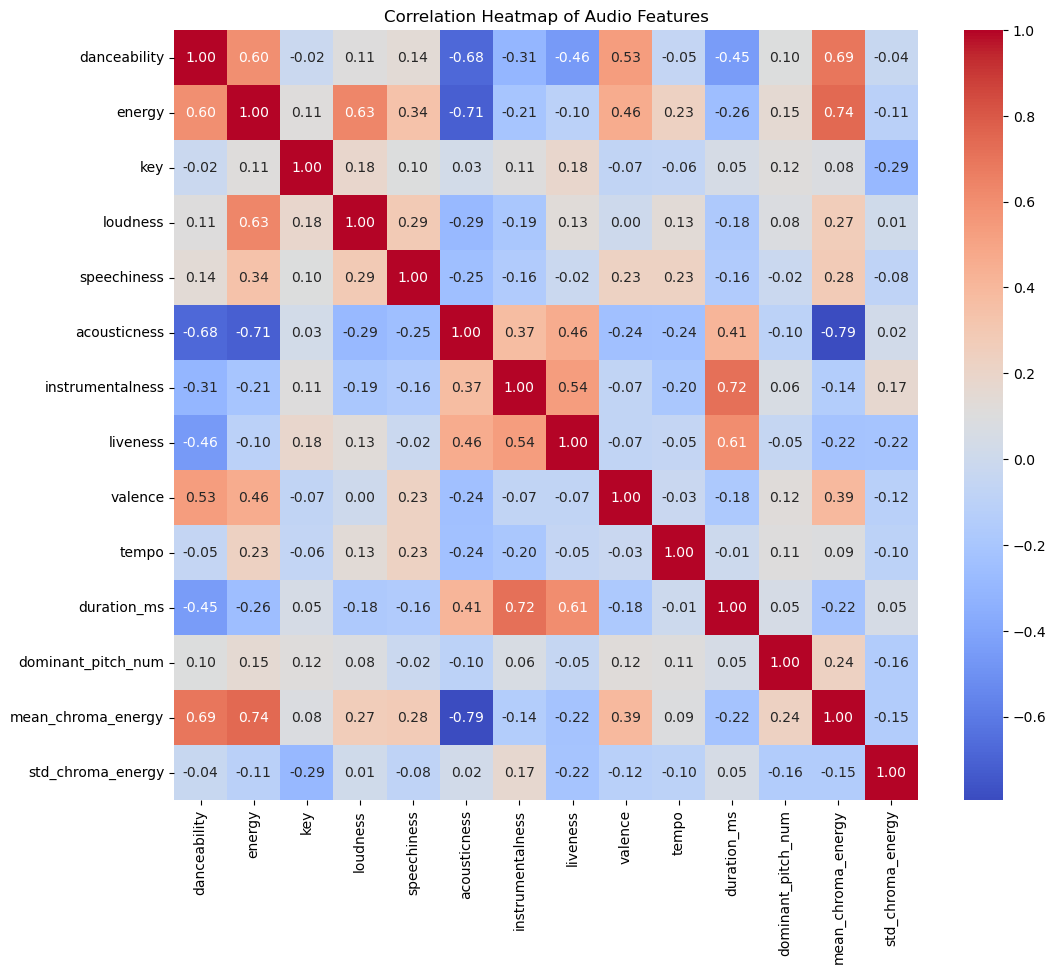


Statistically Significant Correlations (p < 0.05):
danceability - energy: 0.60 (p=0.0000)
danceability - acousticness: -0.68 (p=0.0000)
danceability - instrumentalness: -0.31 (p=0.0039)
danceability - liveness: -0.46 (p=0.0000)
danceability - valence: 0.53 (p=0.0000)
danceability - duration_ms: -0.45 (p=0.0000)
danceability - mean_chroma_energy: 0.69 (p=0.0000)
energy - loudness: 0.63 (p=0.0000)
energy - speechiness: 0.34 (p=0.0014)
energy - acousticness: -0.71 (p=0.0000)
energy - valence: 0.46 (p=0.0000)
energy - tempo: 0.23 (p=0.0325)
energy - duration_ms: -0.26 (p=0.0172)
energy - mean_chroma_energy: 0.74 (p=0.0000)
key - std_chroma_energy: -0.29 (p=0.0063)
loudness - speechiness: 0.29 (p=0.0081)
loudness - acousticness: -0.29 (p=0.0079)
loudness - mean_chroma_energy: 0.27 (p=0.0127)
speechiness - acousticness: -0.25 (p=0.0193)
speechiness - valence: 0.23 (p=0.0377)
speechiness - tempo: 0.23 (p=0.0362)
speechiness - mean_chroma_energy: 0.28 (p=0.0084)
acousticness - instrumentalnes

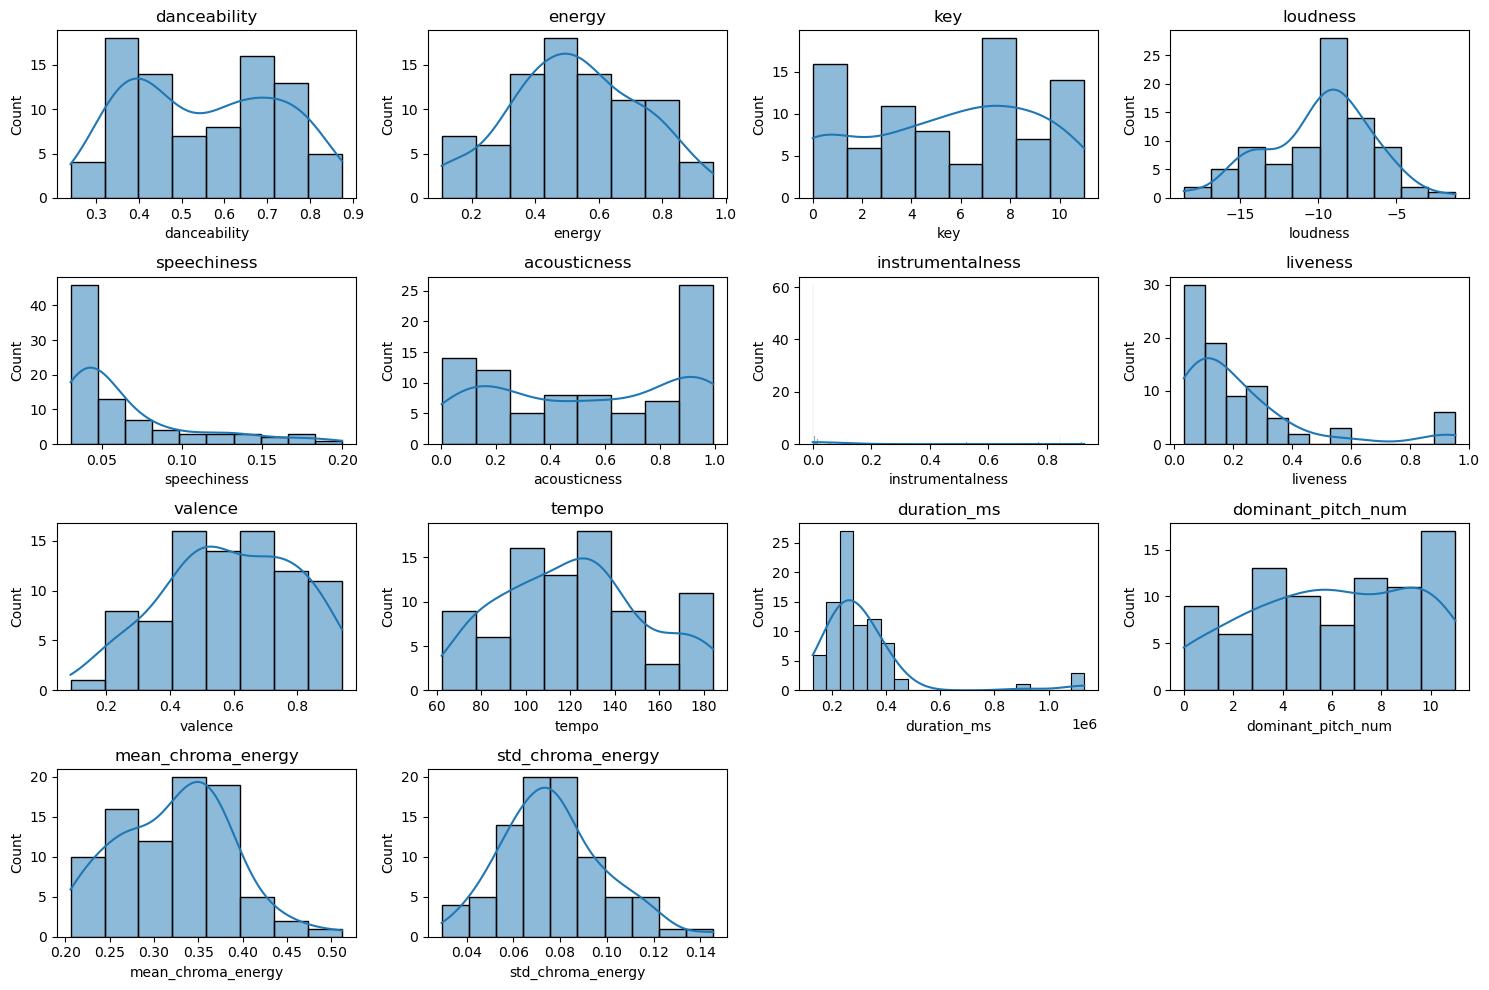

<Figure size 1200x800 with 0 Axes>

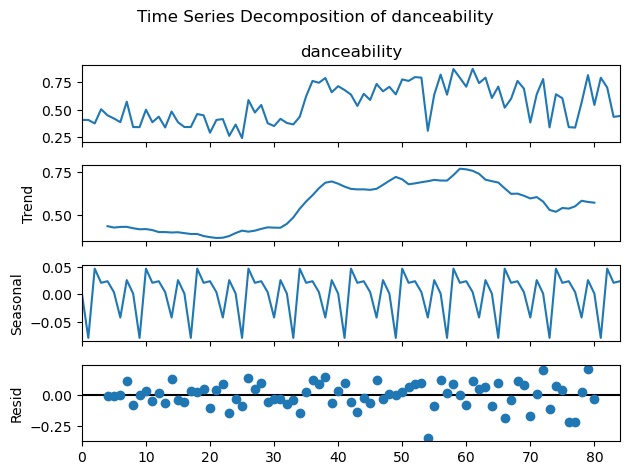

<Figure size 1200x800 with 0 Axes>

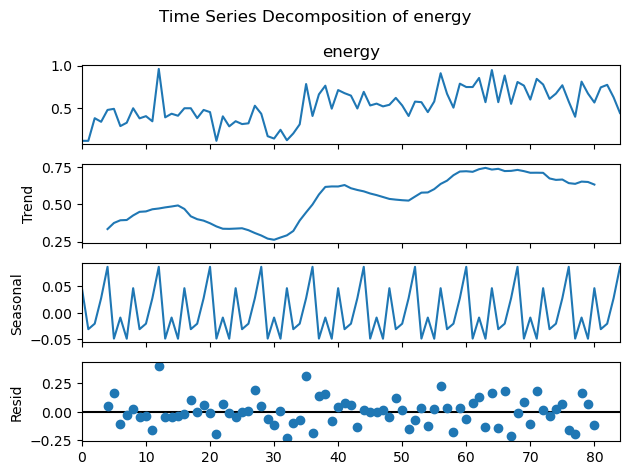

<Figure size 1200x800 with 0 Axes>

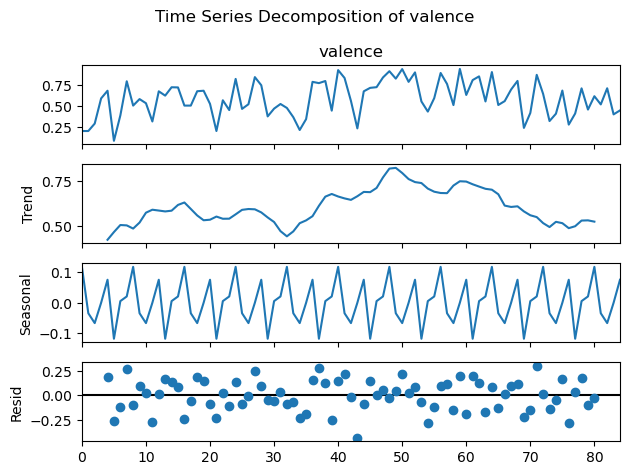

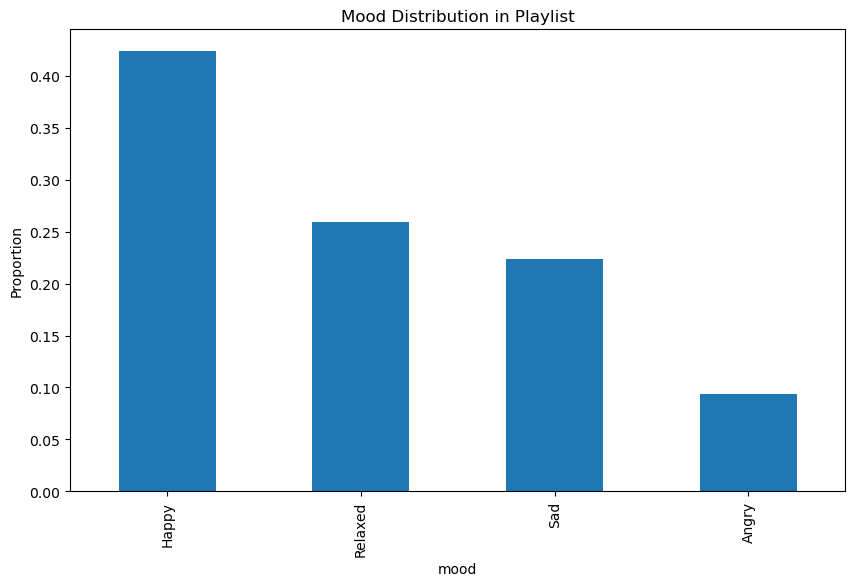


Predictive Model Performance:
Mean Squared Error: 0.0003
R-squared Score: 0.9919

Summary Statistics:
       danceability     energy        key   loudness  speechiness  \
count     85.000000  85.000000  85.000000  85.000000    85.000000   
mean       0.552871   0.524482   5.435294  -9.940988     0.065271   
std        0.172745   0.207526   3.580526   3.343542     0.041043   
min        0.241000   0.106000   0.000000 -18.609000     0.030600   
25%        0.387000   0.392000   2.000000 -11.961000     0.039100   
50%        0.544000   0.523000   6.000000  -9.642000     0.044900   
75%        0.710000   0.668000   8.000000  -8.011000     0.078000   
max        0.875000   0.960000  11.000000  -1.222000     0.200000   

       acousticness  instrumentalness  liveness    valence       tempo  \
count     85.000000         85.000000  85.00000  85.000000   85.000000   
mean       0.548822          0.082190   0.22760   0.589081  121.842329   
std        0.349689          0.230156   0.22948   0.2

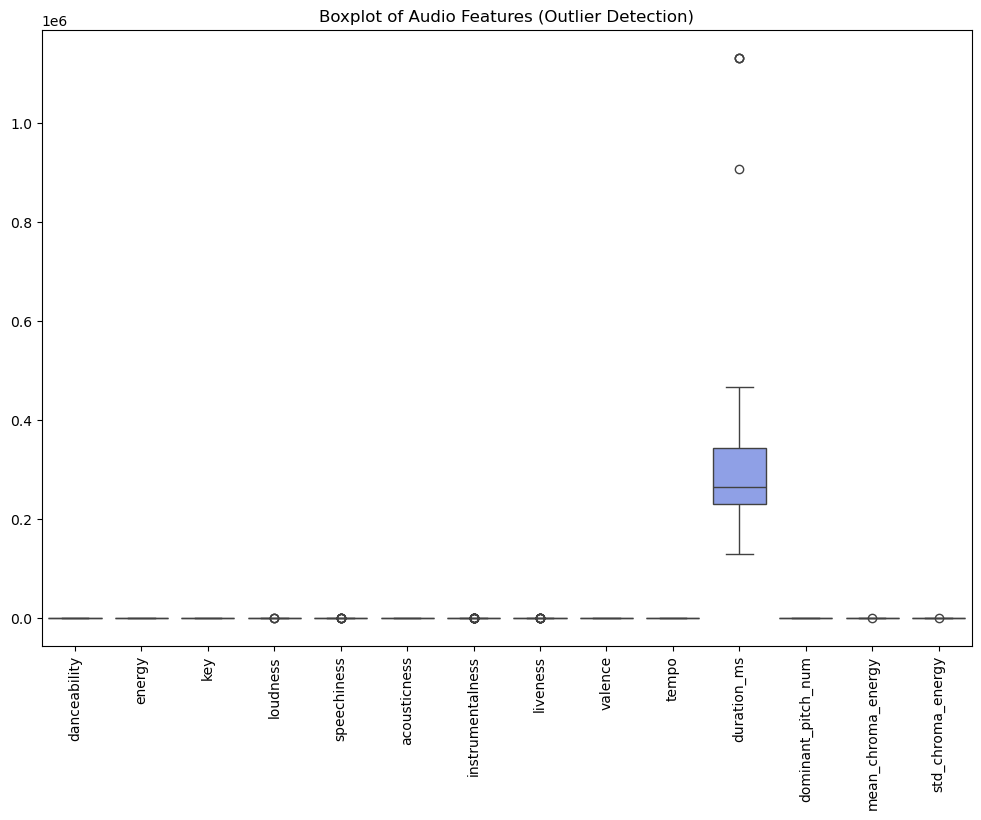

In [19]:
analyze_playlist_patterns(song_data)


Conclusions about Your Music Taste:
1. You prefer music with vocals.
2. You enjoy faster-paced music.
3. The dominant mood in your playlist is Happy.
4. You seem to prefer songs in the key of 0 and in Minor mode.
5. Based on your preferences, you seem to enjoy a mix of musical styles 


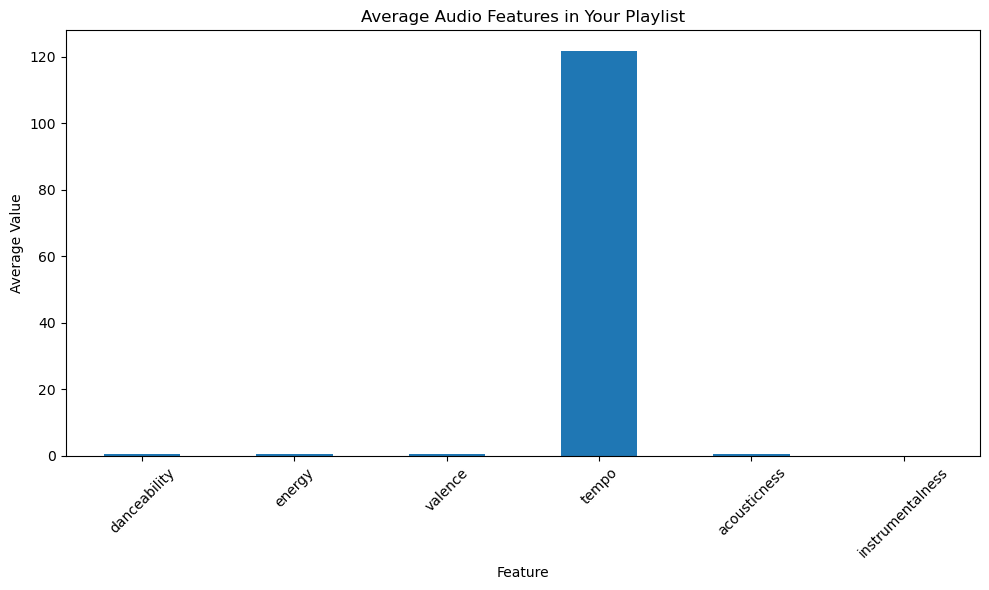

In [20]:
import numpy as np
import pandas as pd
from collections import Counter

def analyze_music_taste(song_data):
    """Analyze music taste based on genre and audio feature analysis"""
    
    # Convert song_data to a DataFrame
    columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
               'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
               'duration_ms', 'time_signature', 'dominant_pitch', 'mean_chroma_energy', 'std_chroma_energy']
    df = pd.DataFrame([item[0] for item in song_data], columns=columns)
            
    # Analyze audio feature tendencies
    feature_means = df[['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness']].mean()
    
    # Analyze mood distribution
    df['mood'] = df.apply(lambda row: 'Happy' if row['valence'] > 0.5 and row['energy'] > 0.5 else
                                      'Sad' if row['valence'] <= 0.5 and row['energy'] <= 0.5 else
                                      'Angry' if row['valence'] <= 0.5 and row['energy'] > 0.5 else 'Relaxed', axis=1)
    mood_distribution = df['mood'].value_counts(normalize=True)
    
    # Analyze key and mode preferences
    key_preference = df['key'].mode().values[0]
    mode_preference = 'Major' if df['mode'].mean() > 0.5 else 'Minor'
    
    # Draw conclusions
    conclusions = []
        
    # Audio feature conclusions
    if feature_means['danceability'] > 0.7:
        conclusions.append("You prefer highly danceable music.")
    elif feature_means['danceability'] < 0.4:
        conclusions.append("You prefer less danceable, possibly more complex rhythms.")
    
    if feature_means['energy'] > 0.7:
        conclusions.append("You enjoy high-energy, intense music.")
    elif feature_means['energy'] < 0.4:
        conclusions.append("You prefer calmer, more relaxed music.")
    
    if feature_means['valence'] > 0.7:
        conclusions.append("You tend to listen to very positive and upbeat music.")
    elif feature_means['valence'] < 0.4:
        conclusions.append("You're drawn to music with a more melancholic or serious tone.")
    
    if feature_means['acousticness'] > 0.7:
        conclusions.append("You have a strong preference for acoustic sounds.")
    elif feature_means['acousticness'] < 0.3:
        conclusions.append("You prefer music with more electronic or produced sounds.")
    
    if feature_means['instrumentalness'] > 0.5:
        conclusions.append("You enjoy instrumental music without vocals.")
    else:
        conclusions.append("You prefer music with vocals.")
    
    # Tempo conclusions
    if feature_means['tempo'] > 120:
        conclusions.append("You enjoy faster-paced music.")
    elif feature_means['tempo'] < 90:
        conclusions.append("You prefer slower, possibly more relaxed music.")
    
    # Mood conclusions
    primary_mood = mood_distribution.index[0]
    conclusions.append(f"The dominant mood in your playlist is {primary_mood}.")
    
    # Key and mode conclusions
    conclusions.append(f"You seem to prefer songs in the key of {key_preference} and in {mode_preference} mode.")
    
    # Overall style conclusion
    style_conclusion = "Based on your preferences, you seem to enjoy "
    if feature_means['energy'] > 0.6 and feature_means['tempo'] > 120:
        style_conclusion += "upbeat and energetic music "
    elif feature_means['energy'] < 0.4 and feature_means['acousticness'] > 0.6:
        style_conclusion += "mellow and acoustic music "
    elif feature_means['danceability'] > 0.7 and feature_means['energy'] > 0.6:
        style_conclusion += "danceable and lively music "
    else:
        style_conclusion += "a mix of musical styles "
    conclusions.append(style_conclusion)
    
    # Print conclusions
    print("\nConclusions about Your Music Taste:")
    for i, conclusion in enumerate(conclusions, 1):
        print(f"{i}. {conclusion}")
    
    # Visualization of audio feature tendencies
    plt.figure(figsize=(10, 6))
    feature_means.plot(kind='bar')
    plt.title('Average Audio Features in Your Playlist')
    plt.xlabel('Feature')
    plt.ylabel('Average Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

analyze_music_taste(song_data)